# Interfacing R in Python for Bioinformatics


<br>

 <div class="alert alert-block alert-info">
    <b></b> Learn to interface r in python using the <b>rpy2</b> library 
</div>

<hr>

__What we will go over__
- Collecting Data
- Converting Python Dataframe to R dataframe
- Converting the Datatypes using rpy2
- Using ggplot2 to plot data  

<hr>

## Collecting the data

Here we will use data from the 1000 genome project. This is a sample dataset from the large file available on the internet

__Linux Command__

In [1]:
# Get the data
!wget https://raw.githubusercontent.com/VarunSendilraj/test/main/1000-genomes_other_sample_info_sample_info.csv

--2021-01-09 19:37:49--  https://raw.githubusercontent.com/VarunSendilraj/test/main/1000-genomes_other_sample_info_sample_info.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.128.133, 151.101.192.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1004874 (981K) [text/plain]
Saving to: ‘1000-genomes_other_sample_info_sample_info.csv.1’

1000-genomes_other_ 100%[===================>] 981.32K  --.-KB/s    in 0.1s    

2021-01-09 19:37:50 (9.48 MB/s) - ‘1000-genomes_other_sample_info_sample_info.csv.1’ saved [1004874/1004874]



__Windows/Mac__

In [2]:
import urllib.request
url = 'https://raw.githubusercontent.com/VarunSendilraj/test/main/1000-genomes_other_sample_info_sample_info.csv'
filename = 'genomes_other_sample_info_sample_info.csv'
urllib.request.urlretrieve(url, filename)

('genomes_other_sample_info_sample_info.csv',
 <http.client.HTTPMessage at 0x7f0adc6db2b0>)

------------------------------------------------------------------------

## Converting Python Dataframe to R dataframe

Lets start of by importing the nessary libraries to open and convert the python dataframe to an R dataframe

In [3]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

now lets open the file that we have downloaded using pandas `read_csv` function

In [4]:
df = pd.read_csv('1000-genomes_other_sample_info_sample_info.csv')
df.head()

,Sample,Family_ID,Population,Population_Description,Gender,Relationship,Unexpected_Parent_Child,Non_Paternity,Siblings,Grandparents,...,In_Final_Phase_Variant_Calling,Has_Omni_Genotypes,Has_Axiom_Genotypes,Has_Affy_6_0_Genotypes,Has_Exome_LOF_Genotypes,EBV_Coverage,DNA_Source_from_Coriell,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
0,HG00096,HG00096,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,20.31,NaN,NaN,EUR,European
1,HG00097,HG00097,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,169.49,NaN,NaN,EUR,European
2,HG00098,HG00098,GBR,British in England and Scotland,male,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,EUR,European
3,HG00099,HG00099,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,23.04,NaN,NaN,EUR,European
4,HG00100,HG00100,GBR,British in England and Scotland,female,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,116.22,NaN,NaN,EUR,European


In [5]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


With the conversion of pandas DataFrame to R DataFrame, the converstion has trouble encoding float and int values so lets start of by converting the enitre dataframe into a string.

In [6]:
df = df.applymap(str)
print(type(df['In_Final_Phase_Variant_Calling'][0]))

<class 'str'>


Now lets Convert the Pandas DataFrame to a R DataFrame using localcoverter from the rpy2 library 

Learn more about this function here: https://rpy2.github.io/doc/v3.0.x/html/generated_rst/pandas.html

In [7]:
with localconverter(ro.default_converter + pandas2ri.converter):
  r_df = ro.conversion.py2rpy(df)

print(type(r_df))

<class 'rpy2.robjects.vectors.DataFrame'>


<hr>

## Converting the Datatypes using rpy2


### Understand the Data

In [8]:
r_df

Sample,Family_ID,Population,...,Has_Sequence_from_Blood_in_Index,Super_Population,Super_Population_Description
'HG00096','HG00096','GBR',...,'nan','EUR','European'
'HG00097','HG00097','GBR',,'nan','EUR','European'
'HG00098','HG00098','GBR',,'nan','EUR','European'
'HG00099','HG00099','GBR',,'nan','EUR','European'
...,...,...,,...,...,...
'NA21141','NA21141','GIH',,'nan','SAS','South As...
'NA21142','NA21142','GIH',,'nan','SAS','South As...
'NA21143','NA21143','GIH',,'nan','SAS','South As...
'NA21144','NA21144','GIH',,'nan','SAS','South As...


Lets print out all of the column names to get a better understanding of whats in our dataframe

In [9]:
print(f'This dataframe has {r_df.ncol} columns and {r_df.nrow} rows\n')
print(r_df.colnames)

This dataframe has 62 columns and 3500 rows

 [1] "Sample"                              "Family_ID"                          
 [3] "Population"                          "Population_Description"             
 [5] "Gender"                              "Relationship"                       
 [7] "Unexpected_Parent_Child"             "Non_Paternity"                      
 [9] "Siblings"                            "Grandparents"                       
[11] "Avuncular"                           "Half_Siblings"                      
[13] "Unknown_Second_Order"                "Third_Order"                        
[15] "In_Low_Coverage_Pilot"               "LC_Pilot_Platforms"                 
[17] "LC_Pilot_Centers"                    "In_High_Coverage_Pilot"             
[19] "HC_Pilot_Platforms"                  "HC_Pilot_Centers"                   
[21] "In_Exon_Targetted_Pilot"             "ET_Pilot_Platforms"                 
[23] "ET_Pilot_Centers"                    "Has_Sequence_in_Phas

In the previous steps, we have converted all values in the dataframe into a string datatype

Before we perform graphing, let convert those values back into integers and Floats

Lets start of by defining the as_numeric function (to convert datatype to int and float) and the match function (works like the index function in python)

In [10]:
#define the as_integer function
as_numeric = ro.r('as.numeric')
#define the Match function
match = ro.r.match

Since there are alot of lists that need to be converted into numbers, lets store the column names that need to be converted into an integer and iterate through it in a for loop

In [12]:
#columns
numCol = ['Has_Sequence_in_Phase1','In_Phase1_Integrated_Variant_Set','Has_Phase1_chrY_SNPS','Has_phase1_chrY_Deletions','Has_phase1_chrMT_SNPs','LC_Passed_QC','E_Passed_QC','In_Final_Phase_Variant_Calling','Has_Omni_Genotypes', 'Has_Axiom_Genotypes','Has_Affy_6_0_Genotypes','Has_Exome_LOF_Genotypes', 'Has_Sequence_from_Blood_in_Index', 'Total_LC_Sequence', 'LC_Non_Duplicated_Aligned_Coverage','Total_Exome_Sequence', 'X_Targets_Covered_to_20x_or_greater', 'VerifyBam_E_Omni_Free', 'VerifyBam_E_Affy_Free', 'VerifyBam_E_Omni_Chip', 'VerifyBam_E_Affy_Chip', 'VerifyBam_LC_Omni_Free', 'VerifyBam_LC_Affy_Free','VerifyBam_LC_Omni_Chip','VerifyBam_LC_Affy_Chip', 'LC_Indel_Ratio', 'E_Indel_Ratio', 'EBV_Coverage']
#loop
for col in numCol:
    my_col = match(col, r_df.colnames)[0] #returned as a vector 
    print('Type of read count before as.numeric: %s' % r_df[my_col - 1].rclass[0])
    r_df[my_col - 1] = as_numeric(r_df[my_col - 1])
    print('Type of read count after as.numeric: %s' % r_df[my_col - 1].rclass[0])

Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count after as.numeric: numeric
Type of read count before as.numeric: character
Type of read count aft

as seen above we have been able to convert our charachter datatype into the integer data type

lets do the same and convert the float values into a numeric datatype

<hr>

## Using ggplot2 to plot the data

Now lets use __ggplot2__ from the __rpy2__ library to plot our data

Lets start of by making a bar graph plotting the count of people per a country that participated in the 100 genome project

In [17]:
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects.functions import SignatureTranslatedFunction

ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme, init_prm_translate = {'axis_text_x': 'axis.text.x'})

bar = ggplot2.ggplot(r_df) + ggplot2.geom_bar() + ggplot2.aes_string(x='Population') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1))

ro.r.png('out.png', type='cairo-png')
bar.plot()
dev_off = ro.r('dev.off')
dev_off()


1


This may look a little bit intimidating but its mainly just nessasary boilerplate Code

code for plotting:
`bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1))`

format:
`var = ggplot2.ggplot(**DATAFRAME**) + ggplot.**GRAPH** + ggplot2.aes_string(x='**X-AXIS**') + ggplot2.theme(**ADJUST THE THEME HOWEVER NEEDED**)`



In the end the graph will be stored in a pdf but ou can also view the file in your jupyter notbook

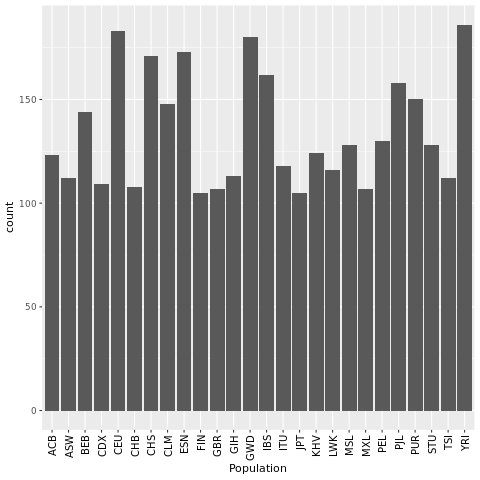

In [18]:
from IPython.display import Image

Image(filename='out.png')

now lets create a scatterplot to compare the `Total_LC_Sequence` and the `LC_Non_Duplicated_Aligned_Coverage` in the 1000 genome project with relation to the population and gender

In [23]:
pp = ggplot2.ggplot(r_df) + ggplot2.aes_string(x='Total_LC_Sequence', y='LC_Non_Duplicated_Aligned_Coverage', col='Population', shape='Gender') + ggplot2.geom_point()


ro.r.png('scatter.png', type='cairo-png')
pp.plot()
dev_off = ro.r('dev.off')
dev_off()


1


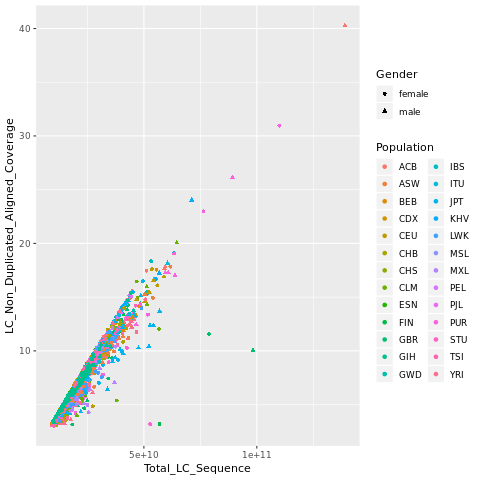

In [24]:
# veiw the image 
from IPython.display import Image

Image(filename='scatter.png')

We can plot the same thing with box plots aswell

In [26]:
bp = ggplot2.ggplot(r_df) + ggplot2.aes_string(x='Total_LC_Sequence', y='LC_Non_Duplicated_Aligned_Coverage', fill='Population') + ggplot2.geom_boxplot()

ro.r.png('box.png', type='cairo-png')
bp.plot()
dev_off = ro.r('dev.off')
dev_off()


2


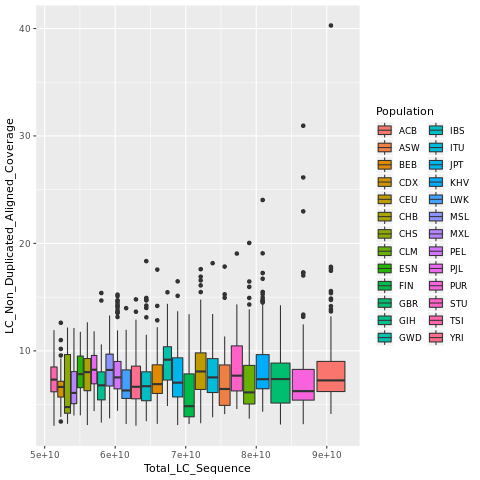

In [27]:
# veiw the image 
from IPython.display import Image

Image(filename='box.png')

There are more things you can do with ggplot and rpy2, If you want to learn more refer to the doucmentation on graphing : 
https://rpy.sourceforge.io/rpy2/doc-dev/html/graphics.html

 <div class="alert alert-block alert-success">
    Check out the Medium Article Tutorial: <b>Comming Soon</b>
    <br>
    <br>
    Check Out My Github Profile: <a>https://github.com/VarunSendilraj</a>
</div>

<hr>